In [1]:
import pandas as pd

import quant as qt

In [2]:
qt.plot.set_plot_options()

# Compare many against the benchmark

In [3]:
qt.api.mf_list(filter=["Parag", "Flexi", "Direct", "Growth"])

,schemeCode,schemeName,isinGrowth,isinDivReinvestment
16890,122639,Parag Parikh Flexi Cap Fund - Direct Plan - Gr...,INF879O01027,None


In [4]:
qt.api.mf_list(filter=["SBI", "Large|Flexi|Focused", "Direct", "Growth"])

,schemeCode,schemeName,isinGrowth,isinDivReinvestment
14536,119598,SBI Large Cap FUND-DIRECT PLAN -GROWTH,INF200K01QX4,None
14654,119718,SBI Flexicap Fund - DIRECT PLAN - Growth Option,INF200K01UG1,None
14657,119721,SBI LARGE & MIDCAP FUND -DIRECT PLAN -Growth,INF200K01UJ5,None
14661,119727,SBI FOCUSED FUND - DIRECT PLAN -GROWTH,INF200K01RJ1,None


In [5]:
qt.api.mf_list(filter=["ICICI", "Value", "Direct", "Growth"])

,schemeCode,schemeName,isinGrowth,isinDivReinvestment
15210,120323,ICICI Prudential Value Fund (erstwhile Value D...,INF109K012K1,None
35785,152365,ICICI Prudential Nifty50 Value 20 Index Fund -...,INF109KC16T3,None
36298,152936,ICICI Prudential Nifty200 Value 30 Index Fund ...,INF109KC13X2,None


In [6]:
vehicles = (
    pd.DataFrame.quant.ticker(
        [
            "INF879O01027",
            "INF200K01UG1",
            "INF200K01QX4",
            "INF200K01UJ5",
            "INF200K01RJ1",
            "INF109K012K1",
        ]
    )
    .quant.palign()
    .quant.to_returns()
    .quant.rename(
        [
            "Parag Parikh Flexi",
            "SBI Flexi",
            "SBI Large",
            "SBI Large&Mid",
            "SBI Focused",
            "ICICI Value",
        ]
    )
)
vehicles.quant.describe()

,Parag Parikh Flexi,SBI Flexi,SBI Large,SBI Large&Mid,SBI Focused,ICICI Value
Start Date,2018-01-02 00:00:00,2018-01-02 00:00:00,2018-01-02 00:00:00,2018-01-02 00:00:00,2018-01-02 00:00:00,2018-01-02 00:00:00
End Date,2025-07-10 00:00:00,2025-07-10 00:00:00,2025-07-10 00:00:00,2025-07-10 00:00:00,2025-07-10 00:00:00,2025-07-10 00:00:00
Num Points,1849,1849,1849,1849,1849,1849
Missing Values,0,0,0,0,0,0
Frequency,1 days 00:00:00,1 days 00:00:00,1 days 00:00:00,1 days 00:00:00,1 days 00:00:00,1 days 00:00:00
Min,-0.085638,-0.118654,-0.12876,-0.120703,-0.120607,-0.098147
Max,0.061542,0.066724,0.077286,0.059878,0.052978,0.078603
Mean,0.000764,0.000528,0.000567,0.000639,0.000594,0.000701


In [7]:
bmk = pd.DataFrame.quant.ticker("^NSEI").quant.to_returns()
bmk.quant.describe()

Ticker,^NSEI
Start Date,2007-09-18 00:00:00
End Date,2025-07-11 00:00:00
Num Points,4368
Missing Values,0
Frequency,1 days 00:00:00
Min,-0.129805
Max,0.177441
Mean,0.000481


Start date: 2018-01-03
End date: 2025-07-10


,Start Date,End Date,Drawdown
Parag Parikh Flexi,2020-02-13,2020-03-24,-31.20%
SBI Flexi,2020-01-24,2020-03-23,-35.80%
SBI Large,2020-01-16,2020-03-23,-37.08%
SBI Large&Mid,2020-02-20,2020-03-23,-36.43%
SBI Focused,2020-02-20,2020-03-23,-32.74%
ICICI Value,2018-09-07,2020-03-23,-36.70%


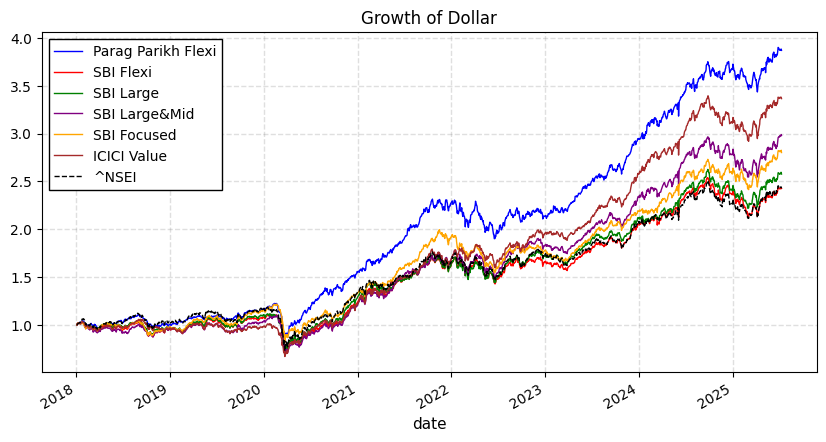

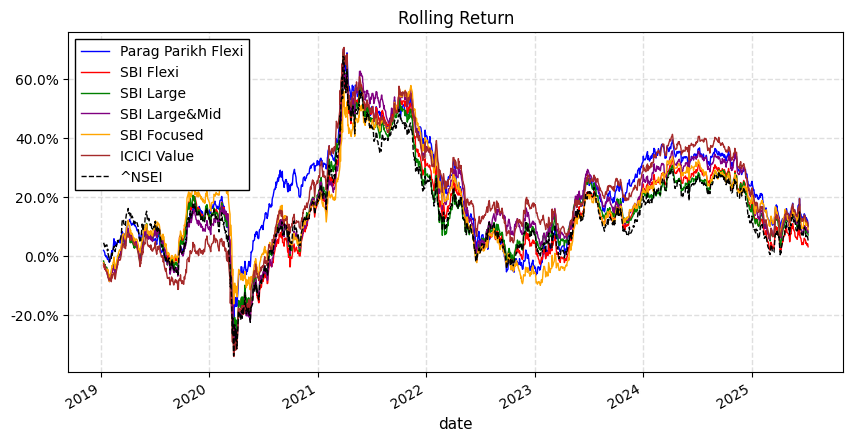

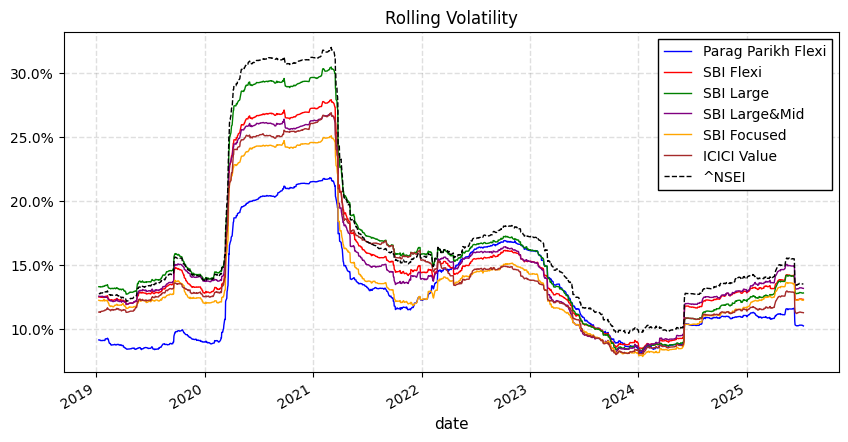

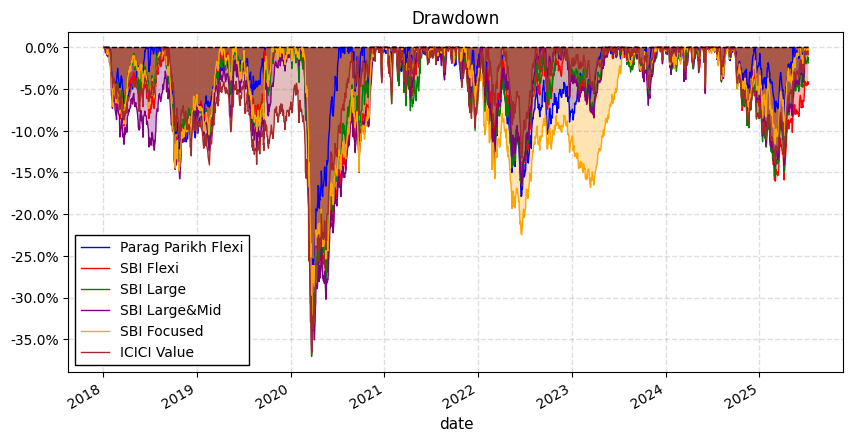

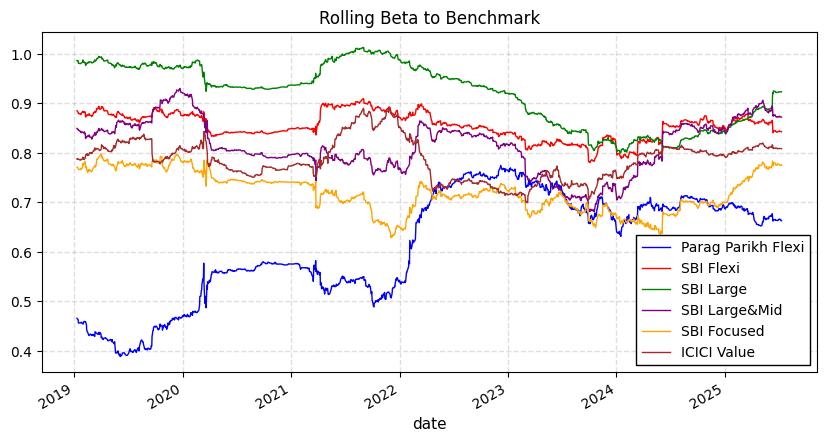

In [8]:
df = pd.concat([vehicles, bmk], axis=1).quant.ralign()
qt.backtest.perf_report(df[vehicles.columns], bmk=df[bmk.columns])

<Axes: >

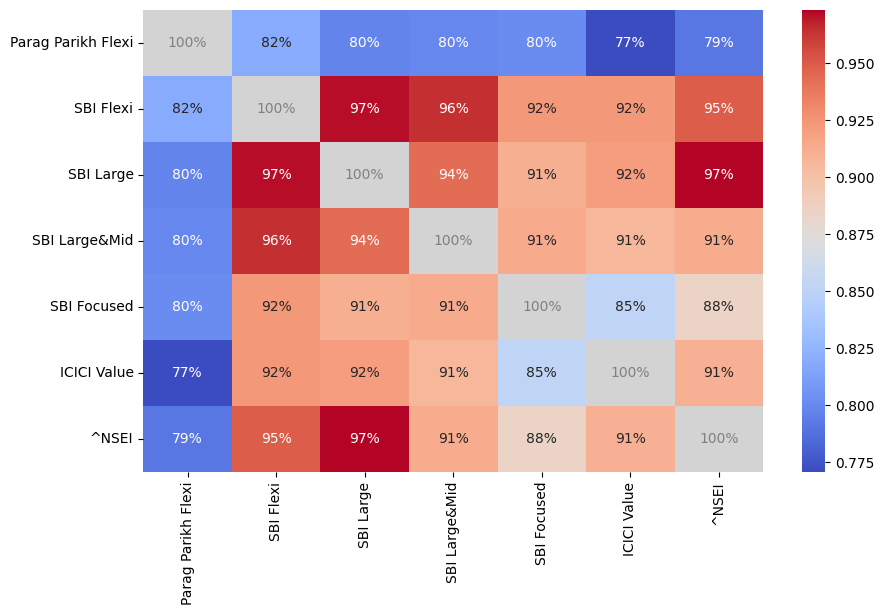

In [9]:
qt.plot.heatmap(df.corr())

# Portfolio Construction

In [10]:
portfolio = qt.Portfolio(vehicles.iloc[:, :])
portfolio

Portfolio(assets=6)
Period: 2018-01-02 to 2025-07-10
Rebalance: M
Assets: Parag Parikh Flexi, SBI Flexi, SBI Large... and 3 more

In [11]:
portfolio.kelly_weights()

Parag Parikh Flexi    1.000000e+00
SBI Flexi             8.326673e-17
SBI Large             0.000000e+00
SBI Large&Mid         3.330669e-16
SBI Focused           0.000000e+00
ICICI Value           1.249001e-15
dtype: float64

In [12]:
portfolio.mvo_weights()

Parag Parikh Flexi    1.000000e+00
SBI Flexi             0.000000e+00
SBI Large             3.469447e-18
SBI Large&Mid         0.000000e+00
SBI Focused           9.714451e-17
ICICI Value           4.163336e-16
dtype: float64